In [47]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir("D:\\meridianthe4\\PML\\Datasets")

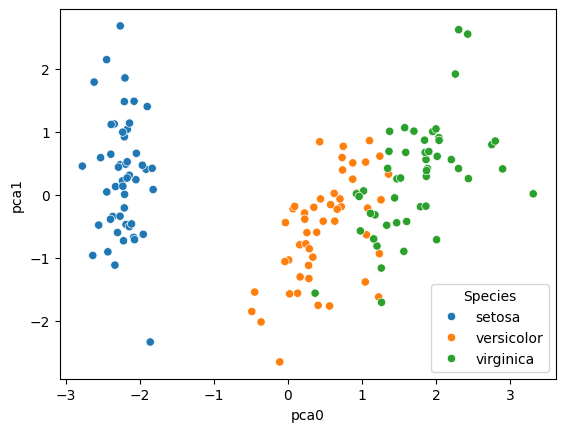

In [26]:
iris = pd.read_csv("iris.csv")
X, y = iris.drop("Species", axis=1), iris["Species"]
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
prcomp = PCA().set_output(transform="pandas")
X_pca = prcomp.fit_transform(X_scaled)
X_pca["Species"] = y
sns.scatterplot(data=X_pca, x="pca0", y="pca1", hue="Species")
plt.show()

In [28]:
np.cumsum(prcomp.explained_variance_ratio_)*100

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

In [38]:
X, y = iris.drop("Species", axis=1), iris["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
scaler = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
prcomp = PCA().set_output(transform="pandas")
X_train_pca = prcomp.fit_transform(X_train_scaled)
X_test_pca = prcomp.transform(X_test_scaled)

In [43]:
# X_train_pca.iloc[:, :2]
lr = LogisticRegression()
lr.fit(X_train_pca.iloc[:, :2], y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred = lr.predict(X_test_pca.iloc[:, :2])
y_pred_proba = lr.predict_proba(X_test_pca.iloc[:, :2])

In [50]:
print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Log Loss: 0.2318315429693499
Accuracy: 0.9


In [51]:
y_pred

array(['setosa', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa'],
      dtype=object)

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [55]:
os.chdir("D:\\meridianthe4\\PML\\Cases")

In [56]:
hr = pd.read_csv("HR_comma_sep.csv")

In [57]:
X, y = hr.drop("left", axis=1), hr["left"]
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X = col_transformer.fit_transform(X)

In [63]:
scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
prcomp = PCA().set_output(transform="pandas")
X_pca = prcomp.fit_transform(X_scaled)
np.cumsum(prcomp.explained_variance_ratio_)*100

array([ 10.42723133,  20.58793491,  27.95567097,  34.76490283,
        41.43340638,  47.76274027,  53.86705251,  59.78971986,
        65.6726812 ,  71.52370417,  77.29664846,  82.69834762,
        87.55599268,  92.10660041,  95.62030665,  98.658159  ,
        99.46053041, 100.        ])

In [66]:
X, y = hr.drop("left", axis=1), hr["left"]
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X = col_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
prcomp = PCA().set_output(transform="pandas")
X_train_pca = prcomp.fit_transform(X_train_scaled)
X_test_pca = prcomp.transform(X_test_scaled)
lr = LogisticRegression()
for n_features in [8, 9, 10, 11, 12, 13, 14, 15, 16]:
    lr.fit(X_train_pca.iloc[:, :n_features], y_train)
    y_pred = lr.predict(X_test_pca.iloc[:, :n_features])
    y_pred_proba = lr.predict_proba(X_test_pca.iloc[:, :n_features])
    print(f"Number of Features: {n_features}")
    print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}") 
    print("-----------------------------")

Number of Features: 8
Log Loss: 0.46333623273050234
Accuracy: 0.7789263087695899
-----------------------------
Number of Features: 9
Log Loss: 0.4610811151172431
Accuracy: 0.7809269756585528
-----------------------------
Number of Features: 10
Log Loss: 0.46106886914798006
Accuracy: 0.7809269756585528
-----------------------------
Number of Features: 11
Log Loss: 0.4568495466265619
Accuracy: 0.7759253084361454
-----------------------------
Number of Features: 12
Log Loss: 0.45522208809247744
Accuracy: 0.7765921973991331
-----------------------------
Number of Features: 13
Log Loss: 0.4554215647587755
Accuracy: 0.7769256418806268
-----------------------------
Number of Features: 14
Log Loss: 0.45349684143691854
Accuracy: 0.7725908636212071
-----------------------------
Number of Features: 15
Log Loss: 0.4537673831853833
Accuracy: 0.7709236412137379
-----------------------------
Number of Features: 16
Log Loss: 0.43169249976053253
Accuracy: 0.7815938646215406
----------------------------

In [68]:
from sklearn.pipeline import Pipeline

In [69]:
for n_features in [8, 9, 10, 11, 12, 13, 14, 15, 16]:
    prcomp = PCA(n_components=n_features).set_output(transform="pandas")
    pipe = Pipeline([('SCL', scaler), ('PCA', prcomp), ('LR', lr)])
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(X_test)
    y_pred = pipe.predict(X_test)
    print(f"Number of Features: {n_features}")
    print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("-----------------------------")

Number of Features: 8
Log Loss: 0.46333623273050234
Accuracy: 0.7789263087695899
-----------------------------
Number of Features: 9
Log Loss: 0.4610811151172431
Accuracy: 0.7809269756585528
-----------------------------
Number of Features: 10
Log Loss: 0.46106886914798006
Accuracy: 0.7809269756585528
-----------------------------
Number of Features: 11
Log Loss: 0.4568495466265619
Accuracy: 0.7759253084361454
-----------------------------
Number of Features: 12
Log Loss: 0.45522208809247744
Accuracy: 0.7765921973991331
-----------------------------
Number of Features: 13
Log Loss: 0.4554215647587755
Accuracy: 0.7769256418806268
-----------------------------
Number of Features: 14
Log Loss: 0.45349684143691854
Accuracy: 0.7725908636212071
-----------------------------
Number of Features: 15
Log Loss: 0.4537673831853833
Accuracy: 0.7709236412137379
-----------------------------
Number of Features: 16
Log Loss: 0.43169249976053253
Accuracy: 0.7815938646215406
----------------------------

In [ ]:
scores = []
for p_features in np.linspace(0.5, 0.95, 15):
    prcomp = PCA(n_components=p_features).set_output(transform="pandas")
    pipe = Pipeline([('SCL', scaler), ('PCA', prcomp), ('LR', lr)])
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(X_test)
    y_pred = pipe.predict(X_test)
    scores.append((p_features*100, log_loss(y_test, y_pred_proba), accuracy_score(y_test, y_pred)))
scores_df = pd.DataFrame(scores, columns=["Pct_Var_Explained", "Log_Loss", "Accuracy"])
scores_df.sort_values("Log_Loss") 

,Pct_Var_Explained,Log_Loss,Accuracy
12,88.571429,0.453497,0.772591
13,91.785714,0.453497,0.772591
14,95.000000,0.453767,0.770924
9,78.928571,0.455222,0.776592
10,82.142857,0.455222,0.776592
11,85.357143,0.455422,0.776926
7,72.500000,0.456850,0.775925
8,75.714286,0.456850,0.775925
5,66.071429,0.461069,0.780927
6,69.285714,0.461069,0.780927


## Involving Column Transformer in the Pipeline

In [79]:
hr = pd.read_csv("HR_comma_sep.csv")
X, y = hr.drop("left", axis=1), hr["left"]
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform="pandas")
col_transformer = ColumnTransformer([("OHE", ohe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough', 
                                    verbose_feature_names_out=False)
col_transformer = col_transformer.set_output(transform="pandas")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [80]:
scores = []
for p_features in np.linspace(0.5, 0.95, 15):
    prcomp = PCA(n_components=p_features).set_output(transform="pandas")
    pipe = Pipeline([('TRNFS', col_transformer), ('SCL', scaler), ('PCA', prcomp), ('LR', lr)])
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.predict_proba(X_test)
    y_pred = pipe.predict(X_test)
    scores.append((p_features*100, log_loss(y_test, y_pred_proba), accuracy_score(y_test, y_pred)))
scores_df = pd.DataFrame(scores, columns=["Pct_Var_Explained", "Log_Loss", "Accuracy"])
scores_df.sort_values("Log_Loss") 

,Pct_Var_Explained,Log_Loss,Accuracy
12,88.571429,0.453497,0.772591
13,91.785714,0.453497,0.772591
14,95.000000,0.453767,0.770924
9,78.928571,0.455222,0.776592
10,82.142857,0.455222,0.776592
11,85.357143,0.455422,0.776926
7,72.500000,0.456850,0.775925
8,75.714286,0.456850,0.775925
5,66.071429,0.461069,0.780927
6,69.285714,0.461069,0.780927
